In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train[:1000]
X_train = X_train.reshape(1000,784)
X_train = X_train / 255.0

y_train = y_train[:1000]

X_test = X_test[1000:1300]
y_test = y_test[1000:1300]
X_test = X_test.reshape(300,784)
X_test = X_test / 255.0

Iteration:  0
Iteration:  10
Converged at iteration:  17


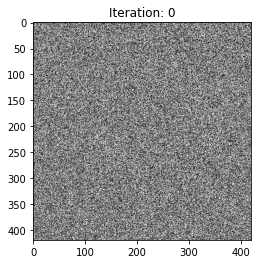

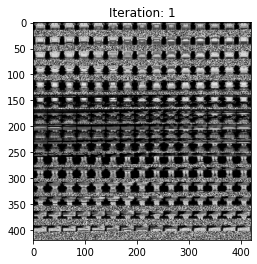

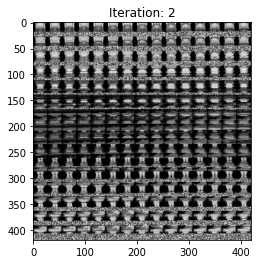

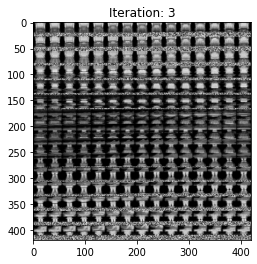

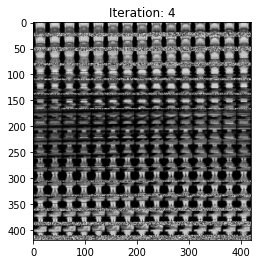

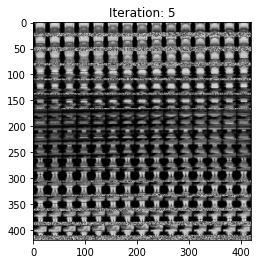

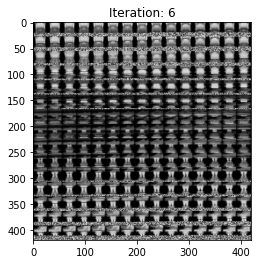

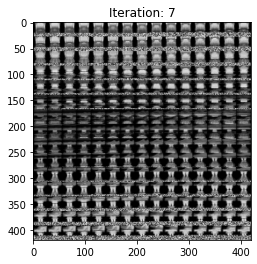

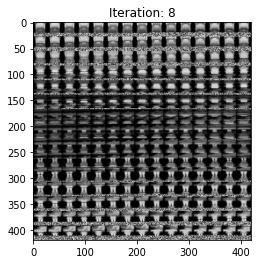

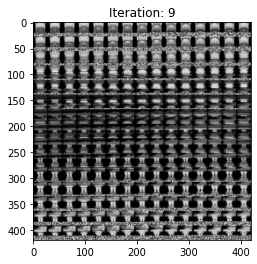

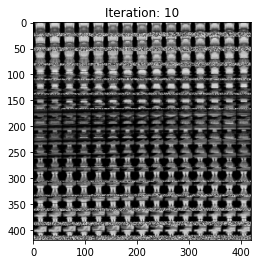

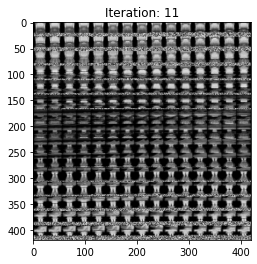

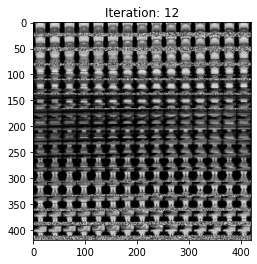

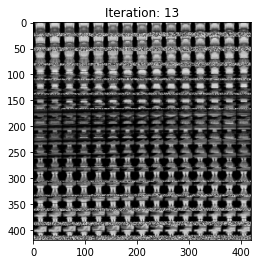

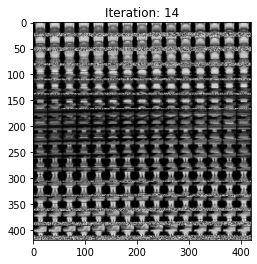

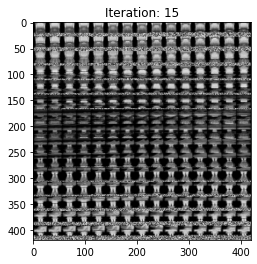

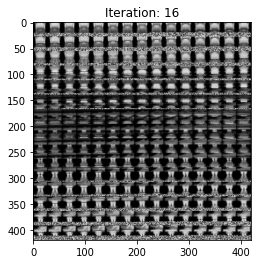

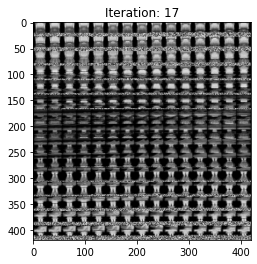

In [12]:
W = np.random.rand(225,784)
W = W.reshape(15,15,784)

alpha = 0.6


for iteration in range(100):

    plt.figure()
    W_img = W.reshape(420, 420)
    plt.imshow(W_img, cmap='gray')
    plt.title("Iteration: " + str(iteration))
    
    if iteration % 10 == 0:
        print("Iteration: ", iteration)
    
    W_last = np.copy(W)

    for x in X_train:
        Dj = []
        for m in range(W.shape[0]):
            for n in range(W.shape[1]):
                Dj.append(np.sum(np.square(W[m][n] - x)))

        min_arg_j = np.argmin(Dj) 
        m = int(min_arg_j/W.shape[0])
        n = min_arg_j%W.shape[1]

        W[m][n] += alpha*(x - W[m][n])
        if m != W.shape[0]-1:
            W[m+1][n] += alpha*(x - W[m+1][n])
        if m != 0 :
            W[m-1][n] += alpha*(x - W[m-1][n])
        if n != W.shape[1]-1:
            W[m][n+1] += alpha*(x - W[m][n+1])
        if n != 0 :
            W[m][n-1] += alpha*(x - W[m][n-1])

                
    alpha = 0.5*alpha
    
    if np.linalg.norm(W_last - W) < 0.001:
        print("Converged at iteration: ", iteration)
        break

In [13]:
y_preds = []
for x in X_test:
    Dj = []
    for m in range(W.shape[0]):
        for n in range(W.shape[1]):
            Dj.append(np.sum(np.square(W[m][n]-x)))
    y_preds.append(np.argmin(Dj))

Text(0, 0.5, 'Frequency')

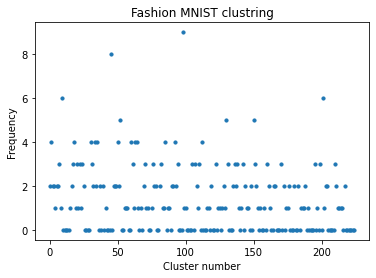

In [14]:

cluster, cluster_count = np.unique(y_preds, return_counts=True)
cluster_numbers = [0 for _ in range(225)]
for i in range(len(cluster)):
    cluster_numbers[cluster[i]] = cluster_count[i]


plt.scatter(range(225), cluster_numbers, s=10)
plt.title("Fashion MNIST clustring")
plt.xlabel("Cluster number")
plt.ylabel("Frequency")

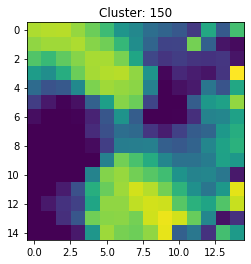

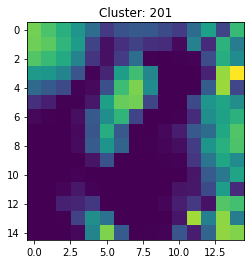

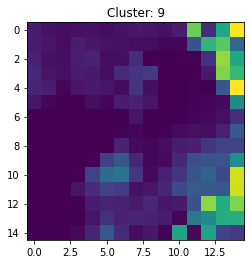

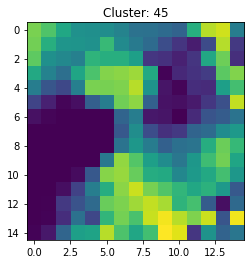

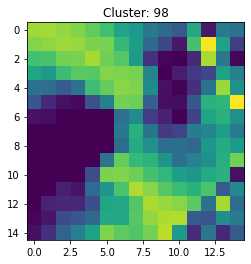

In [26]:
dense = np.argsort(cluster_numbers)[-5:]

for i in dense:
    plt.figure()
    plt.imshow(W[:, :, i])
    plt.title("Cluster: " + str(i))